In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys

In [7]:
sys.path.append("../")

In [165]:
def is_sequence_a_peak(model,sequence,alphabet="AGTC"):
    neighbor=[s for s in sequence]
    sequence_fitness=model.get_fitness(sequence)
    for position in range(len(sequence)):
        for aa in alphabet:
            if aa!=sequence[position]:
               neighbor[position]=aa
               neighbor_string="".join(neighbor)
               if sequence_fitness<model.get_fitness(neighbor_string):
                  return 0
               neighbor=[s for s in sequence]
    return 1

In [221]:
def get_all_peaks(landscape):
    peaks=set()
    for seq in landscape.sequences:
        if is_sequence_a_peak(landscape,seq):
           peaks.add(seq)
    return peaks

In [222]:
from models.Ground_truth_oracles.TF_binding_landscape_models import *

In [223]:
landscape_constructor=TF_binding_landscape_constructor()
landscape_constructor.load_landscapes(landscapes_to_test = ['SIX6_REF_R1'])

1 TF landscapes loaded.


In [224]:
landscape_constructor=landscape_constructor.generate_from_loaded_landscapes()
landscape=next(landscape_constructor)

In [225]:
peaks= get_all_peaks(landscape["landscape_oracle"])

In [226]:
len(peaks)

335

In [261]:
data=pd.read_csv("../simulations/evaluations_test_six6/consistency_robustness_independence/Greedy_mu1_tr0.05_r0.1_rho1.csv")

In [262]:
data1=pd.read_csv("../simulations/evaluations_test_six6/consistency_robustness_independence/MLWFG_mu1_r0.1_rho1_beta100.csv")

In [263]:
data.tail()

,id,batch,sequence,true_score,model_score,batch_size,measurement_cost,virtual_evals,landscape_id,start_id,model_type,virtual_screen,horizon,explorer_type
120115,e10cc822-3f24-11ea-a902-f218984ddad3,10,AATTCAAG,0.403950,2.076782,100,1001,50009,SIX6_REF_R1,TF14,Null,50,1,Greedy_mu1_tr0.05_r0.1_rho1
120116,e10cc822-3f24-11ea-a902-f218984ddad3,10,ATCGTTCT,0.746866,2.074357,100,1001,50009,SIX6_REF_R1,TF14,Null,50,1,Greedy_mu1_tr0.05_r0.1_rho1
120117,e10cc822-3f24-11ea-a902-f218984ddad3,10,ACATCAAC,0.534264,2.072839,100,1001,50009,SIX6_REF_R1,TF14,Null,50,1,Greedy_mu1_tr0.05_r0.1_rho1
120118,e10cc822-3f24-11ea-a902-f218984ddad3,10,GCACATCT,0.234352,2.072582,100,1001,50009,SIX6_REF_R1,TF14,Null,50,1,Greedy_mu1_tr0.05_r0.1_rho1
120119,e10cc822-3f24-11ea-a902-f218984ddad3,10,GTTGCACC,0.248248,2.070758,100,1001,50009,SIX6_REF_R1,TF14,Null,50,1,Greedy_mu1_tr0.05_r0.1_rho1


In [245]:
data.model_type.unique()

array(['NAMb_ss0', 'NAMb_ss0.5', 'NAMb_ss0.9', 'NAMb_ss1', 'nn_arch=LNN',
       'nn_arch=NLNN_hd50', 'nn_arch=CNNa_hd100_f50', 'Null'],
      dtype=object)

In [246]:
data.columns

Index(['id', 'batch', 'sequence', 'true_score', 'model_score', 'batch_size',
       'measurement_cost', 'virtual_evals', 'landscape_id', 'start_id',
       'model_type', 'virtual_screen', 'horizon', 'explorer_type'],
      dtype='object')

In [247]:
data['id'].unique()

array(['e10cc822-3f24-11ea-a902-f218984ddad3'], dtype=object)

In [264]:
sub_data=data[(data['virtual_screen']==50)]# &(data['id']=='48eb64e4-3f1b-11ea-8fd5-f218984ddad3')]#[data.model_type=="nn_arch=CNNa_hd100_f50"]

In [265]:
sub_data1= data1[(data1['virtual_screen']==50)]

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


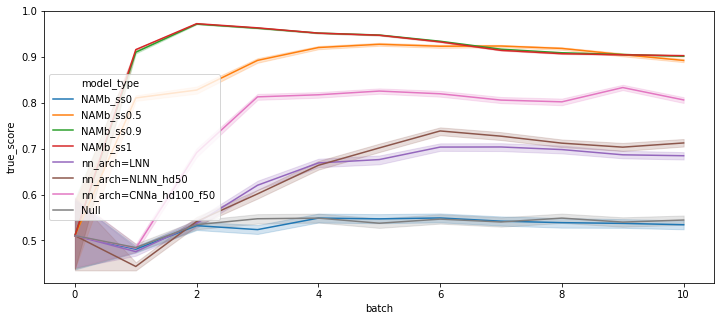

In [266]:
plt.figure(figsize=(12,5))
sns.lineplot(x="batch",y="true_score",hue="model_type",data=sub_data )

In [267]:
sub_data=data[data.model_type=='nn_arch=CNNa_hd100_f50']
sub_data1=data1[data1.model_type=='nn_arch=CNNa_hd100_f50']

In [253]:
all_seqs=sub_data[sub_data.start_id=="TF0"].sequence.unique()

In [254]:
count=0
found_peaks=[]
for seq in all_seqs:
    if seq in peaks:
       found_peaks.append(seq) 
       count+=1
count

13

/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


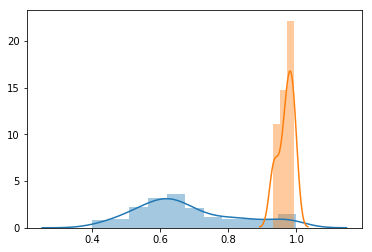

In [255]:
sns.distplot([landscape["landscape_oracle"].get_fitness(x) for x in peaks])
sns.distplot([landscape["landscape_oracle"].get_fitness(x) for x in found_peaks])

In [256]:
def get_top_sequence_per_batch(data):
    top_per_batch=[]
    for i in data.batch.unique():
        sub_data=data[data.batch==i] #must also group by model type and landscape id
        #print (sub_data.true_score.max())
        top_per_batch.append(sub_data.true_score.max())
    return (top_per_batch)

In [257]:
def compute_cumulative_outcomes(data): 
    outcomes=pd.DataFrame(columns=["landscape_id","start_id","model_type","batch","max_fitness","cum_max_fitness"])
    for landscape in data.landscape_id.unique():
        if landscape==str(-1): #or start_id==str(-1):
            continue
        print(landscape)
        valid_start_ids=[x for x in data.start_id.unique()]# if landscape[landscape.index("L"): landscape.index("R")] in x]
        for start_id in valid_start_ids:
            for noisy_model in data.model_type.unique():
                sub_data = data[(data.landscape_id==landscape)&\
                               (data.start_id==start_id)&\
                               (data.model_type==noisy_model)] 
                cum_fit=0
                for batch, max_fitness in enumerate(get_top_sequence_per_batch(sub_data)):
                    if max_fitness>cum_fit:
                       cum_fit = max_fitness 
                    outcomes = outcomes.append(pd.DataFrame.from_records([{"landscape_id":landscape,\
                                          "start_id":start_id,\
                                          "model_type": noisy_model,\
                                          "batch": batch+1, \
                                          "max_fitness": max_fitness,\
                                          "cum_max_fitness": cum_fit}])) 
                    
    return outcomes

In [268]:
outcomes=compute_cumulative_outcomes(sub_data)
outcomes1=compute_cumulative_outcomes(sub_data1)
outcomes.head()

SIX6_REF_R1


/anaconda3/envs/tf3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


SIX6_REF_R1


,batch,cum_max_fitness,landscape_id,max_fitness,model_type,start_id
0,1,0.678143,SIX6_REF_R1,0.678143,nn_arch=CNNa_hd100_f50,TF0
0,2,0.970045,SIX6_REF_R1,0.970045,nn_arch=CNNa_hd100_f50,TF0
0,3,0.970045,SIX6_REF_R1,0.938709,nn_arch=CNNa_hd100_f50,TF0
0,4,0.970045,SIX6_REF_R1,0.948769,nn_arch=CNNa_hd100_f50,TF0
0,5,0.976199,SIX6_REF_R1,0.976199,nn_arch=CNNa_hd100_f50,TF0


/anaconda3/envs/tf3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


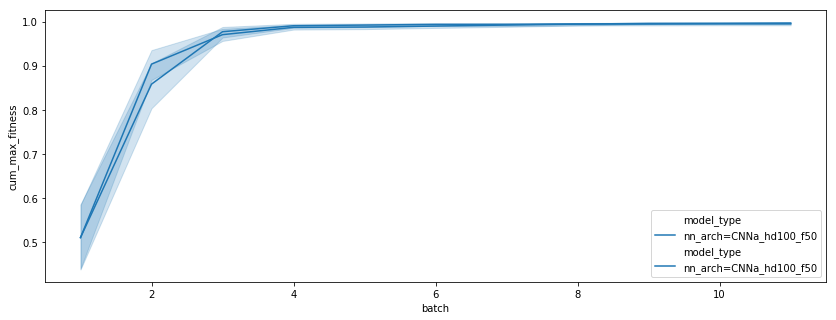

In [274]:
plt.figure(figsize=(14,5))

sns.lineplot(x="batch",y="cum_max_fitness",hue="model_type",data= outcomes)
sns.lineplot(x="batch",y="cum_max_fitness",hue="model_type",data= outcomes1, color="r")